#1. 풀어야할 문제 이해하기


*   정확한 값을 예측하는 회귀 문제인가?
*   입력이 속한 범주를 예측하는 분류 문제인가?



## **[문제] 손으로 쓴 0-9까지 숫자 분류하기**

In [ ]:
#데이터셋 다운로드
#캐글 https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#구글 드라이브에서 불러오기
#데이터 경로 확인
#/content/drive/MyDrive/수업활동/2023_머신러닝과딥러닝/data

%cd /content/drive/MyDrive/ml-class-rhseung/data
!ls

/content/drive/MyDrive/ml-class-rhseung/data
bike_test.csv	  grades.tab  MNIST.pth        movies_train.csv   WineQT.csv
bike_train.csv	  HDI.tab     mnist_test.csv   ratings_train.txt
boston_train.csv  heart.csv   mnist_train.csv  titanic_test.csv
country.xlsx	  iris.tab    movies_test.csv  titanic_train.csv


# 2. 데이터 파악하기


*   입력 자료형과 정답 확인하기
*   클래스 간의 불균형은 없는지 확인하기
*   누락된 데이터 혹은 자료형에 맞지 않는 데이터가 포함되어 있는지 확인하기



In [4]:
#데이터 파악을 위한 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path

In [5]:
#데이터 불러오기
dir = '/content/drive/MyDrive/ml-class-rhseung/data'
train = pd.read_csv(path.join(dir, 'mnist_train.csv'))
test = pd.read_csv(path.join(dir, 'mnist_test.csv'))
#데이터 크기 확인
train.shape, test.shape

((60000, 785), (10000, 785))

In [6]:
#입력 자료형과 정답 확인
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

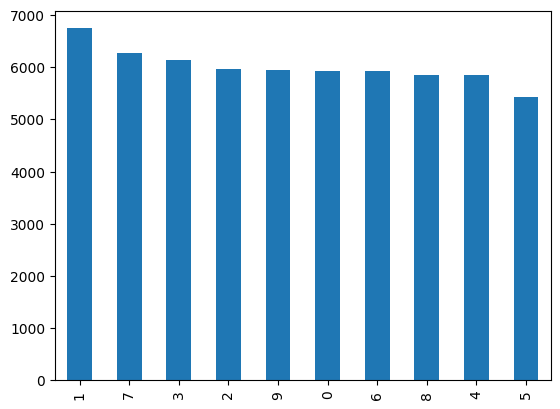

In [7]:
#클래스(정답) 간의 불균형은 없는지 확인하기
train['label'].value_counts()
train['label'].value_counts().sort_index() #인덱스로 정렬하여 보여주기 .sort_index()
train['label'].value_counts().plot(kind='bar') #막대 그래프로 보여주기 .plot(kind='bar')

In [8]:
 #누락된 데이터 혹은 자료형에 맞지 않는 데이터가 포함되어 있는지 확인하기
train.info()
train.describe()
train.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


0

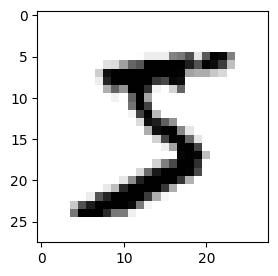

In [9]:
#이미지 확인하기
#2차원 넘파이 데이터로 변환하기
sample = train.iloc[0][1:]
sample.shape
sample_numpy = sample.to_numpy()
sample_numpy.shape
sample_numpy_2D = sample_numpy.reshape(28,28)
sample_numpy_2D.shape
#이미지로 출력하기
plt.figure(figsize=(3,3))
plt.imshow(sample_numpy_2D)
plt.imshow(sample_numpy_2D, cmap=plt.cm.gray_r, interpolation = "nearest")

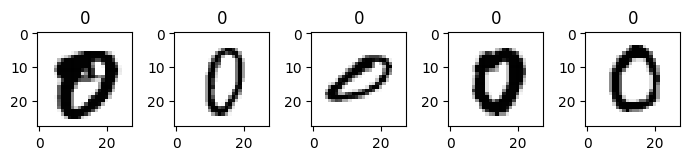

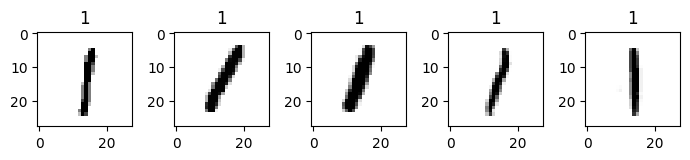

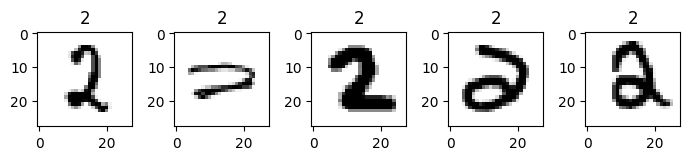

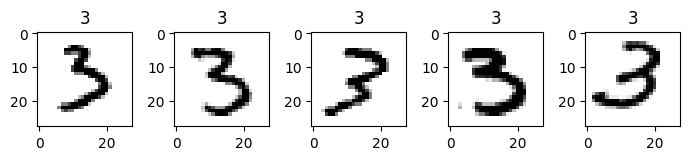

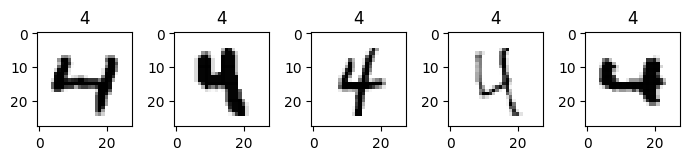

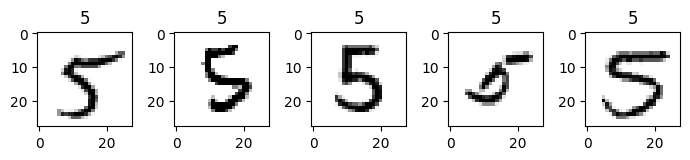

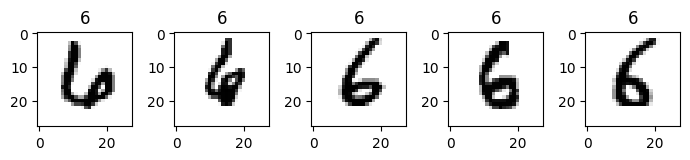

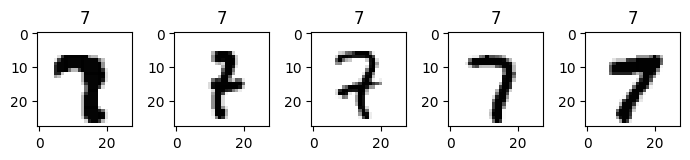

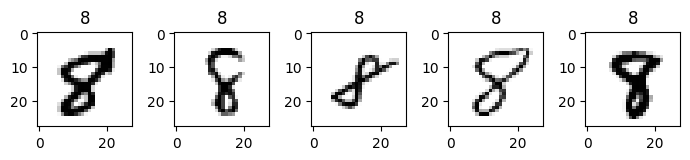

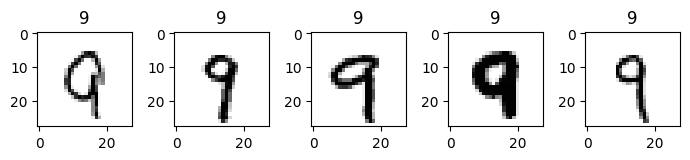

In [10]:
#각 클래스별 데이터 5개씩 출력해보기
import random

for i in range(10):
    train_ = train[train['label']==i]
    ends = len(train_)
    ids = random.sample(range(0,ends), 5)

    plt.figure(figsize=(7,2))
    for i, j in enumerate(ids):
        plt.subplot(1,5,i+1)
        image = train_.iloc[j][1:].to_numpy().reshape(28,28)
        plt.title(train_.iloc[j][0])
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation = "nearest")
        plt.tight_layout()

# 3. 데이터 전처리


*   학습에 필요한 데이터가 부족하다면 데이터 증강하기
*   데이터를 정규화해서 값의 범위 맞추기
*   문제 데이터, 정답 데이터 분리
*   학습 데이터, 검증 데이터, 테스트 데이터 분리 : 클래스별 균형 맞추기



In [11]:
# 문제 데이터와 정답 데이터 분리
train_X = train.iloc[:,1:].values
train_Y = train.iloc[:,0].values
test_X = test.iloc[:,1:].values
test_Y = test.iloc[:,0].values

In [12]:
#데이터 정규화
train_X, test_X = train_X / 255.0, test_X / 255.0
train_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
#학습 데이터와 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2, stratify=train_Y, random_state=42 )

# 4. 모델 설계 및 학습

(모델 설계)
*   문제의 복잡성, 사용 가능한 데이터의 양 및 종류, 예측이나 분류의 목표 등에 따라 적합한 머신러닝 기법과 모델은 다양하게 변할 수 있다.
*  데이터의 공간 정보가 중요하면 합성곱 적용하기
*  데이터의 순서 정보가 중요하다면 RNN 적용하기

(모델 학습)  
*   적합한 손실 함수 찾기
*   가중치 수정을 위한 최적화 정하기
*   평가지표 정하기  




## 4.1. 머신러닝 - 랜덤 포레스트 알고리즘 적용

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#모델 설계
clf = RandomForestClassifier()

#학습
clf.fit(train_X, train_Y)

In [ ]:
#성능평가
prediction = clf.predict(test_X)

#평가지표 중 정확도
result = (prediction == test_Y).mean()
print(result)

In [ ]:
#분류 성능 평가 지표
from sklearn.metrics import classification_report

print(classification_report(test_Y, prediction))

## 4.2. LightGBM 알고리즘 적용

In [ ]:
from lightgbm import LGBMClassifier

clf2 = LGBMClassifier()
clf2.fit(train_X, train_Y)

prediction2 = clf2.predict(test_X)

print(classification_report(test_Y, prediction2))

## 4.3. 신경망

In [ ]:
#torchvision에서는 데이터셋을 제공해줌

# from torchvision.datasets.mnist import MNIST
# from torchvision.transforms import ToTensor
# from torch.utils.data.dataloader import DataLoader

# training_data = MNIST(root="/content", train=True, download=True, transform=ToTensor())
# test_data =  MNIST(root="/content", train=False, download=True, transform=ToTensor())

# train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

#### 1) 학습 데이터셋 구성

In [14]:
#csv -> padas 데이터프레임 -> numpy 데이터로 변환한 데이터를 활용하는 경우
import torch
from torch.utils.data import Dataset, DataLoader

#커스텀 Dataset 정의
class myDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        features = self.X[idx]
        target = self.Y[idx]
        return torch.tensor(features, dtype=torch.float32), torch.tensor(target, dtype=torch.long)

#X_train, X_valid, y_train, y_valid
train_dataset = myDataset(X_train, y_train)
valid_dataset = myDataset(X_valid, y_valid)
test_dataset = myDataset(test_X, test_Y)
#Dataset을 DataLoader로 변환
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32)

In [15]:
for data, label in test_dataloader:
    print(data.shape)
    print(label.shape)
    break

torch.Size([32, 784])
torch.Size([32])


### 2) 모델 설계 및 학습

#### 기본 코드

In [18]:
!pip install torchmetrics

  Using cached torchmetrics-1.1.2-py3-none-any.whl (764 kB)
  Using cached lightning_utilities-0.9.0-py3-none-any.whl (23 kB)


In [17]:
#모델 설계 및 학습
import torch.nn as nn
from torch.optim.adam import Adam
import torchmetrics
device = 'cuda' if torch.cuda.is_available() else 'cpu'
metric = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)

model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,10)
).to(device)
lr = 1e-3 #학습률
optimizer = Adam(model.parameters(), lr=lr) #옵티마이저
lossfunction = nn.CrossEntropyLoss()

#학습
for epoch in range(10):
    model.train()
    for data, label in train_dataloader:
        optimizer.zero_grad()
        data = data.to(device)
        preds = model(data)
        loss = lossfunction(preds, label.to(device))
        acc = metric(preds, label.to(device))
        loss.backward()
        optimizer.step()

    print(f"epoch{epoch+1} loss:{loss.item()}")

#모델 저장하기
torch.save(model.state_dict(), "MNIST.pth")

ModuleNotFoundError: ignored

#### 확장 : 검증 단계 추가

In [30]:
#모델 설계 및 학습
import torch.nn as nn
from torch.optim.adam import Adam
import torchmetrics
device = 'cuda' if torch.cuda.is_available() else 'cpu'
metric = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)

model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,10)
).to(device)

lr = 1e-3 #학습률
optimizer = Adam(model.parameters(), lr=lr) #옵티마이저
lossfunction = nn.CrossEntropyLoss()

train_losses = []
train_accs = []
valid_losses = []
valid_accs = []

#학습
for epoch in range(10):
    model.train()

    train_loss = 0
    train_acc = 0
    valid_loss = 0
    valid_acc = 0

    for data, label in train_dataloader:
        data = data.to(device)
        label = label.to(device)

        optimizer.zero_grad()
        preds = model(data)
        loss = lossfunction(preds, label)
        train_acc = metric(preds, label).item()
        train_loss += loss.item() / batch_size
        loss.backward()
        optimizer.step()

    #검증 단계 추가
    for data, label in valid_dataloader:
        data = data.to(device)
        label = label.to(device)

        optimizer.zero_grad()
        preds = model(data)
        loss = lossfunction(preds, label)
        valid_acc = metric(preds, label).item()
        valid_loss += loss.item() / batch_size
        loss.backward()
        optimizer.step()

    #훈련 loss, 검증 loss 출력
    print(f'epoch{epoch+1:2d} tra_loss:{train_loss:.5f}\ttra_acc:{train_acc:.5f}')
    print(f'        val_loss:{valid_loss:.5f}\tval_acc:{valid_acc:.5f}')

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accs.append(valid_acc)

#모델 저장하기
torch.save(model.state_dict(), "MNIST.pth")

epoch 1 tra_loss:17.36431	tra_acc:0.90625
        val_loss:2.36112	val_acc:0.96875
epoch 2 tra_loss:7.37763	tra_acc:0.93750
        val_loss:1.55278	val_acc:0.96875
epoch 3 tra_loss:5.28333	tra_acc:1.00000
        val_loss:1.17516	val_acc:0.96875
epoch 4 tra_loss:4.07636	tra_acc:0.93750
        val_loss:0.90769	val_acc:0.93750
epoch 5 tra_loss:3.29696	tra_acc:1.00000
        val_loss:0.74931	val_acc:1.00000
epoch 6 tra_loss:2.80656	tra_acc:0.93750
        val_loss:0.61230	val_acc:1.00000
epoch 7 tra_loss:2.36152	tra_acc:0.96875
        val_loss:0.56240	val_acc:0.96875
epoch 8 tra_loss:1.91199	tra_acc:1.00000
        val_loss:0.46917	val_acc:1.00000
epoch 9 tra_loss:1.72723	tra_acc:1.00000
        val_loss:0.40092	val_acc:1.00000
epoch10 tra_loss:1.49443	tra_acc:0.96875
        val_loss:0.38158	val_acc:1.00000


#### 확장 : 시각화

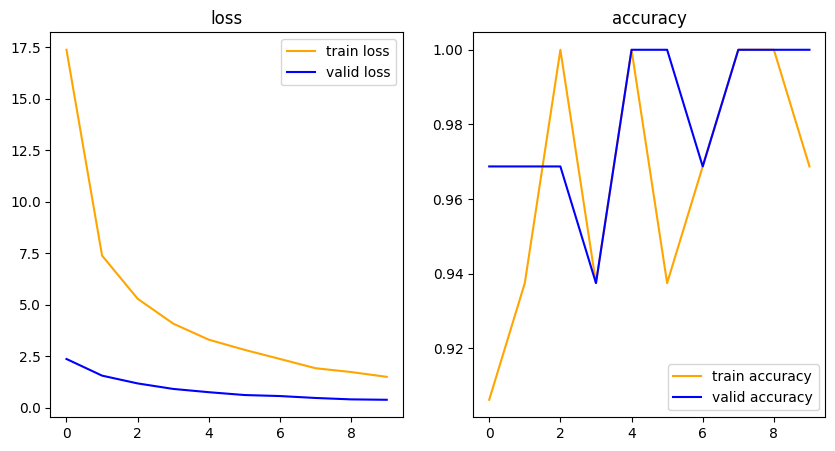

In [33]:
#정확도와 손실 그래프
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(train_losses, c='orange', label='train loss')
ax[0].plot(valid_losses, c='blue', label='valid loss')
ax[0].set_title('loss')
ax[0].legend()

ax[1].plot(train_accs, c='orange', label='train accuracy')
ax[1].plot(valid_accs, c='blue', label='valid accuracy')
ax[1].set_title('accuracy')
ax[1].legend()

plt.show()

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
#모델 요약
import torchsummary
torchsummary.summary(model, (32, 784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 32, 64]          50,240
              ReLU-2               [-1, 32, 64]               0
            Linear-3               [-1, 32, 64]           4,160
              ReLU-4               [-1, 32, 64]               0
            Linear-5               [-1, 32, 10]             650
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.10
Forward/backward pass size (MB): 0.06
Params size (MB): 0.21
Estimated Total Size (MB): 0.37
----------------------------------------------------------------


In [ ]:
model.named_parameters()

<generator object Module.named_parameters at 0x7f8c30cefb50>

In [ ]:
!pip install torchviz

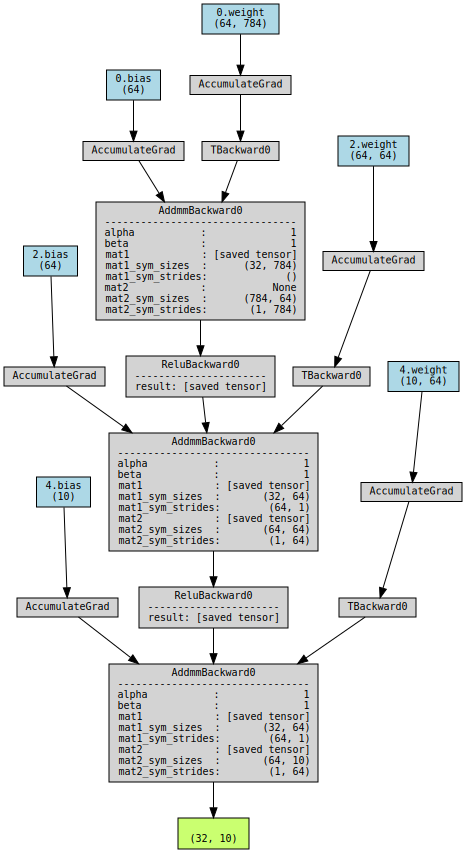

In [ ]:
#모델구조 시각화
from torchviz import make_dot

dummy_input = torch.zeros((32, 784)).to(device)
make_dot(model(dummy_input), params=dict(list(model.named_parameters())), show_attrs=True)

In [ ]:
#텐서보드 활용

### 3) 성능 평가(테스트 데이터)

In [36]:
#torchmetrics 모듈 활용
import torchmetrics

metric = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)
model.load_state_dict(torch.load("MNIST.pth", map_location=device))

with torch.no_grad():
    for data, label in test_dataloader:
        data = data.to(device)
        label = label.to(device)

        preds = model(data).softmax(dim=-1)
        target = label.data
        acc = metric(preds, target)
        # print(f"Accuracy on batch {acc}")

acc = metric.compute()
print(acc)

tensor(0.9754, device='cuda:0')


In [ ]:
#모델 성능 평가
#모델 불러오기
model.load_state_dict(torch.load("MNIST.pth", map_location=device))
num_corr = 0
with torch.no_grad():
    for data, label in test_dataloader:
        data = data.to(device)
        output = model(data)
        preds = output.data.max(1)[1]
        corr = preds.eq(label.to(device).data).sum().item()
        num_corr += corr
    print(f"Accuracy : {num_corr/len(test_X)}")

Accuracy : 0.9765
